In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[0.         0.00314314 0.00628629 0.00942943 0.01257257 0.01571572
 0.01885886 0.022002   0.02514515 0.02828829 0.03143143 0.03457457
 0.03771772 0.04086086 0.044004   0.04714715 0.05029029 0.05343343
 0.05657658 0.05971972 0.06286286 0.06600601 0.06914915 0.07229229
 0.07543544 0.07857858 0.08172172 0.08486486 0.08800801 0.09115115
 0.09429429 0.09743744 0.10058058 0.10372372 0.10686687 0.11001001
 0.11315315 0.1162963  0.11943944 0.12258258 0.12572573 0.12886887
 0.13201201 0.13515516 0.1382983  0.14144144 0.14458458 0.14772773
 0.15087087 0.15401401 0.15715716 0.1603003  0.16344344 0.16658659
 0.16972973 0.17287287 0.17601602 0.17915916 0.1823023  0.18544545
 0.18858859 0.19173173 0.19487487 0.19801802 0.20116116 0.2043043
 0.20744745 0.21059059 0.21373373 0.21687688 0.22002002 0.22316316
 0.22630631 0.22944945 0.23259259 0.23573574 0.23887888 0.24202202
 0.24516517 0.24830831 0.25145145 0.25459459 0.25773774 0.26088088
 0.26402402 0.26716717 0.27031031 0.27345345 0.2765966  0.27973

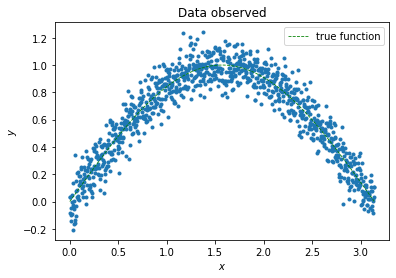

In [89]:
N = 1000 # No. of data points
m = 0.5
c = 2
sigma = 0.1
xs = np.linspace(0, 3.14, N) # x values
ys = np.sin(xs) + np.random.normal(0, sigma, N)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data observed')
plt.plot(xs, ys, '.')
print(xs)
plt.plot(xs, np.sin(xs), 'g--', lw=0.8, label='true function')
plt.legend();

In [90]:
o=3 #order
X=np.zeros((N,o+1))
for i in range(o+1):
    for j in range (N):
        X[j][i]=xs[j]**i
print(X)
#ppending a column of 1's to the column vector xs
y = ys.reshape(-1, 1) # Column vector of ys
wHat = np.dot( np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y) )
print(X)

print(wHat)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.14314314e-03 9.87934882e-06 3.10522075e-08]
 [1.00000000e+00 6.28628629e-03 3.95173953e-05 2.48417660e-07]
 ...
 [1.00000000e+00 3.13371371e+00 9.82016164e+00 3.07735752e+01]
 [1.00000000e+00 3.13685686e+00 9.83987094e+00 3.08662666e+01]
 [1.00000000e+00 3.14000000e+00 9.85960000e+00 3.09591440e+01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.14314314e-03 9.87934882e-06 3.10522075e-08]
 [1.00000000e+00 6.28628629e-03 3.95173953e-05 2.48417660e-07]
 ...
 [1.00000000e+00 3.13371371e+00 9.82016164e+00 3.07735752e+01]
 [1.00000000e+00 3.13685686e+00 9.83987094e+00 3.08662666e+01]
 [1.00000000e+00 3.14000000e+00 9.85960000e+00 3.09591440e+01]]
[[-0.05944269]
 [ 1.3309565 ]
 [-0.42815403]
 [ 0.00153303]]


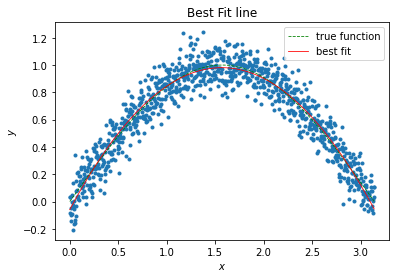

In [91]:
xnew=np.linspace(0,3.14,100)
ynew=np.zeros(100)
for i in range(o+1):
  ynew+=wHat[o-i][0]*xnew**(o-i)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Best Fit line')
plt.plot(xs, ys, '.')
plt.plot(xs,np.sin(xs), 'g--', lw=0.8, label='true function')
plt.plot(xnew, ynew, 'r', lw=0.8, label='best fit')
plt.legend();

In [92]:
betaHatInv = np.linalg.norm(y - np.dot(X, wHat))**2/N
sigmaHat = np.sqrt(betaHatInv)
print("Best estimate for standard deviation of noise rounded off to two decimal places is sigmaHat = {}".format(round(sigmaHat, 2)))

Best estimate for standard deviation of noise rounded off to two decimal places is sigmaHat = 0.1


In [93]:
covMatInv = (1. / betaHatInv) * np.dot(X.T, X)
covMat = np.linalg.inv(covMatInv)
print("Covariance Matrix: \n {}".format(covMat))

Covariance Matrix: 
 [[ 1.54912757e-04 -3.69828645e-04  2.35441670e-04 -4.37172833e-05]
 [-3.69828645e-04  1.17956985e-03 -8.45374494e-04  1.67491498e-04]
 [ 2.35441670e-04 -8.45374494e-04  6.46397724e-04 -1.33419836e-04]
 [-4.37172833e-05  1.67491498e-04 -1.33419836e-04  2.83269290e-05]]


In [94]:
def ProbDens(c, m):
    w = np.array([c, m]).reshape(-1, 1)
    exponent = -0.5 * np.dot((w - wHat).T, np.dot(covMatInv, (w - wHat)))
    return(np.exp(exponent))

In [95]:
Ns=np.zeros((o+1,100))
for i in range(o+1):
    Ns[i]=np.linspace(wHat[i]-0.4,wHat[i]+0.4,100)

x, y = np.meshgrid(Ns[0], Ns[1])
probMatrix = np.zeros( 100* 100).reshape(100, 100)
for i in range(100):
    for j in range(100):
        probMatrix[i, j] = ProbDens(Ns[0][i], Ns[1][j])
probMatrix = probMatrix / np.sum(probMatrix)

ValueError: could not broadcast input array from shape (100,1) into shape (100,)

In [96]:
N_ = 100
xs_ = np.linspace(0,3.14 , N_)
X_=np.zeros((N_,o+1))
for i in range(o+1):
    for j in range (N_):
        X_[j][i]=xs_[j]**i

var_pred = betaHatInv + np.diagonal(np.dot(X_, np.dot(covMat, X_.T)))
sigma_pred = np.sqrt(var_pred)

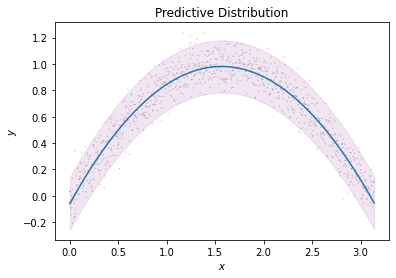

In [98]:
y_pred = np.dot(X_, wHat).reshape(N_)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title("Predictive Distribution")
plt.scatter(xs, ys, facecolor="none", edgecolor="black",s=0.01)
plt.plot(xs_, y_pred)
plt.fill_between(xs_, y_pred - 2 * sigma_pred, y_pred + 2 * sigma_pred, color="purple", alpha=0.1)